<div id="container" style="position:relative;">
<div style="float:left"><h1> Owner: Asli Keser </h1></div>  
      <div style="clear:both;"></div> 
<div style="float:left"><h2> Unit3Deliverable#5 - NLP With Hotel Review - Q4 & Q5 </h2></div>
<div style="position:relative; float:right">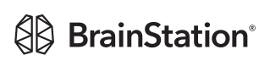
</div>
</div>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
# Read test and train CSVs to DataFrames
X_train_df = pd.read_csv('final_train_df.csv') 
X_test_df = pd.read_csv('final_test_df.csv') 
y_train = pd.read_csv('final_y_train.csv') 
y_test = pd.read_csv('final_y_test.csv') 

In [3]:
X_train_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Days_Since_Review,Latitude,Longitude,Day,...,NEG_wi,NEG_wifi,NEG_window,NEG_without,NEG_work,NEG_worst,NEG_worth,NEG_would,NEG_wrong,NEG_year
0,392,8.8,35,1803,34,17,114,51.529441,-0.123374,11,...,0,0,2,0,0,0,0,1,0,0
1,556,8.0,17,2347,0,1,163,51.526535,-0.136168,21,...,0,0,0,0,0,0,0,0,0,0
2,102,9.6,6,604,74,7,640,41.380181,2.180688,2,...,0,0,0,0,0,0,0,0,0,0
3,128,8.4,53,1472,11,6,703,41.391717,2.159261,31,...,0,0,0,0,0,0,0,0,0,0
4,620,9.0,7,1974,5,1,222,51.506558,-0.004514,24,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train_df.shape

(360639, 1026)

In [5]:
X_test_df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Days_Since_Review,Latitude,Longitude,Day,...,NEG_wi,NEG_wifi,NEG_window,NEG_without,NEG_work,NEG_worst,NEG_worth,NEG_would,NEG_wrong,NEG_year
0,36,7.0,19,251,2,1,297,48.872967,2.292623,10,...,0,0,0,0,1,0,0,0,0,0
1,687,8.9,287,2752,21,16,472,51.515052,-0.159239,18,...,0,0,0,0,1,0,0,1,0,0
2,1831,8.1,7,7105,26,1,148,51.499046,-0.191707,8,...,0,0,0,0,0,0,0,0,0,1
3,2623,8.7,14,12158,6,3,150,51.500961,-0.116591,6,...,0,0,0,0,0,0,0,0,0,0
4,26,5.2,14,465,0,6,668,45.450867,9.194866,5,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_test_df.shape

(154560, 1026)

In [7]:
y_train.head()

,Reviewer_Score
0,0
1,0
2,1
3,1
4,0


In [8]:
y_train.shape

(360639, 1)

In [9]:
y_test.head()

,Reviewer_Score
0,0
1,0
2,1
3,0
4,0


In [10]:
y_test.shape

(154560, 1)

# Modelling (cont.)

4. Using a pipeline, combine PCA with a decision tree classifier.

- Optimize at least 3 hyperparameters including the maximum tree depth and the minimum number of data points required on each leaf node.
- You can use 20 principle components.
- The best parameters should be found using 5-fold cross validation.

Contrast the best results here with the logistic regression model and provide any insights that you may draw from the results.

### Find the optimum maximum tree depth 

In [11]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train_df, y_train)

DecisionTreeClassifier()

In [12]:
print(f"The TRAIN classification accuracy is:  {DT_model.score(X_train_df,y_train)}")

The TRAIN classification accuracy is:  1.0


In [13]:
DT_model.get_depth() # maximum depth until DecisionTreeClassifier reached 100% accuracy

100

In [14]:
best_model = None
best_test_acc = -np.inf
train_scores = []
test_scores = []
depths = []
for MAX_DEPTH in list(range(1,15)):
    depths.append(MAX_DEPTH)
    train_DT = DecisionTreeClassifier(max_depth=MAX_DEPTH)
    train_DT.fit(X_train_df,y_train)
    test_acc = train_DT.score(X_test_df,y_test)
    train_acc = train_DT.score(X_train_df,y_train)
    test_scores.append(test_acc)
    train_scores.append(train_acc)
    if test_acc > best_test_acc:
        best_model = train_DT,
        best_test_acc = test_acc

In [15]:
best_model # optimum depth is found to be 10

(DecisionTreeClassifier(max_depth=10),)

In [16]:
best_test_acc

0.7584239130434782

In [18]:
best_train_acc = best_model[0].score(X_train_df,y_train) #best train accuracy
best_train_acc

0.7672381522797035

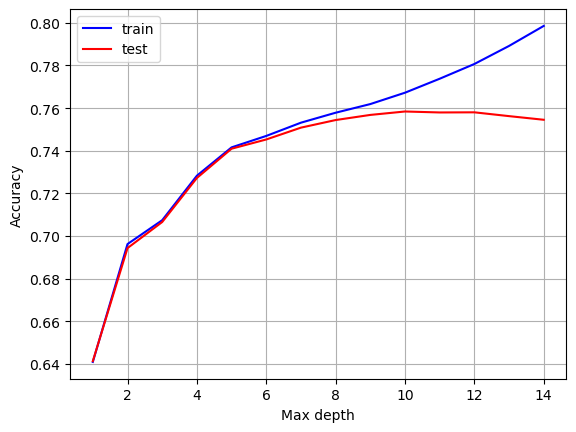

In [22]:
# plot train and test accuracies for different depth values
plt.figure()
plt.plot(depths,train_scores,color='blue',label='train')
plt.plot(depths,test_scores,color='red',label='test')
plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

### Use 20 principle components

In [24]:
# Instantiate & fit PCA model
# Default n_components will generate the same number of PCs as you have features 
# n_components parameter sets the number of features after feature reduction with PCA
my_PCA = PCA(n_components = 20)
my_PCA.fit(X_train_df)

# transform data 
X_train_PCA = my_PCA.transform(X_train_df)
X_test_PCA = my_PCA.transform(X_test_df)

In [25]:
# find the optimum max_depth after PCA
best_model = None
best_test_acc = -np.inf
train_scores = []
test_scores = []
depths = []
for MAX_DEPTH in list(range(1,15)):
    depths.append(MAX_DEPTH)
    train_DT = DecisionTreeClassifier(max_depth=MAX_DEPTH)
    train_DT.fit(X_train_PCA,y_train)
    test_acc = train_DT.score(X_test_PCA,y_test)
    train_acc = train_DT.score(X_train_PCA,y_train)
    test_scores.append(test_acc)
    train_scores.append(train_acc)
    if test_acc > best_test_acc:
        best_model = train_DT,
        best_test_acc = test_acc

In [26]:
best_model  # optimum depth is found to be 10 again

(DecisionTreeClassifier(max_depth=10),)

In [28]:
best_test_acc #slightly lower test accuracy value is obtained after PCA

0.750097049689441

In [30]:
best_train_acc = best_model[0].score(X_train_PCA,y_train) #best train accuracy
best_train_acc #slightly lower train accuracy value is obtained after PCA

0.766608713977135

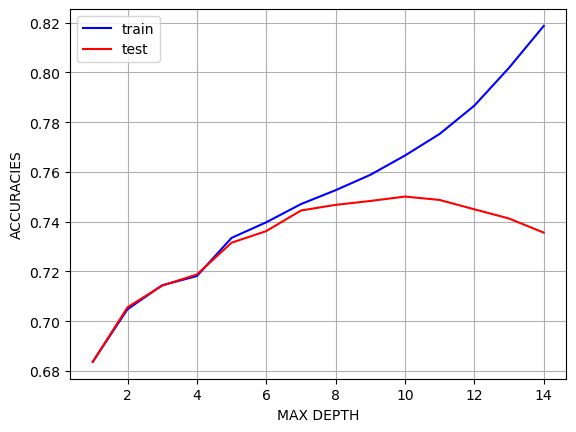

In [31]:
plt.figure()
plt.plot(depths,train_scores,color='blue',label='train')
plt.plot(depths,test_scores,color='red',label='test')
plt.xlabel("MAX DEPTH")
plt.ylabel("ACCURACIES")
plt.legend()
plt.grid()

### Find the optimum minimum sample leaf 

In [39]:
best_model = None
best_test_acc = -np.inf
train_scores = []
test_scores = []
leaves = []
for MIN_SAMPLE_LEAF in list(range(1,5)):
    leaves.append(MIN_SAMPLE_LEAF)
    train_DT = DecisionTreeClassifier(max_depth=10,min_samples_leaf=MIN_SAMPLE_LEAF)
    train_DT.fit(X_train_PCA,y_train)
    test_acc = train_DT.score(X_test_PCA,y_test)
    train_acc = train_DT.score(X_train_PCA,y_train)
    test_scores.append(test_acc)
    train_scores.append(train_acc)
    if test_acc > best_test_acc:
        best_model = train_DT,
        best_test_acc = test_acc

In [40]:
best_model # optimum minimum sample leaf is found to be 3

(DecisionTreeClassifier(max_depth=10, min_samples_leaf=3),)

In [41]:
best_test_acc # slightly higher with the addition of 'min_samples_leaf' parameter

0.7502587991718427

In [42]:
best_train_acc = best_model[0].score(X_train_PCA,y_train) #best train accuracy
best_train_acc #slightly lower train accuracy value is obtained after PCA

0.7664839354590047

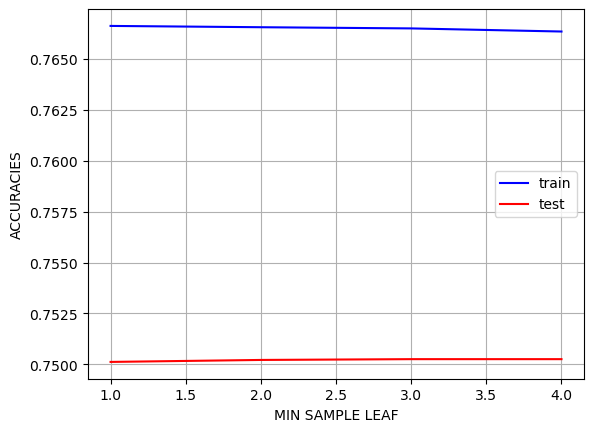

In [43]:
plt.figure()
plt.plot(leaves,train_scores,color='blue',label='train')
plt.plot(leaves,test_scores,color='red',label='test')
plt.xlabel("MIN SAMPLE LEAF")
plt.ylabel("ACCURACIES")
plt.legend()
plt.grid()

### Pipeline

In [44]:
estimators = [('pca',PCA()),
              ('model', DecisionTreeClassifier())]

pipe = Pipeline(estimators)

param_grid = [{'pca__n_components': [20],
               'model__max_depth': [10],
               'model__min_samples_leaf':[3]
              }]
scoring_grid = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

grid = GridSearchCV(pipe, 
                    param_grid, 
                    cv=5,
                    verbose=2,
                    n_jobs=-1,
                    scoring=scoring_grid,
                    refit='accuracy' # balanced distribution so we can use accuracy to refit
                   )
fittedgrid = grid.fit(X_train_df, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [45]:
fittedgrid.score(X_test_df, y_test) 

0.750194099378882

In [55]:
fittedgrid.score(X_train_df, y_train) 

0.765810131461101

In [56]:
print(f"Train score: {fittedgrid.score(X_train_df, y_train)}")
print(f"Test score: {fittedgrid.score(X_test_df, y_test)}")

Train score: 0.765810131461101
Test score: 0.750194099378882


In [46]:
fittedgrid.cv_results_

{'mean_fit_time': array([79.79726014]),
 'std_fit_time': array([0.72547752]),
 'mean_score_time': array([0.75645971]),
 'std_score_time': array([0.05381926]),
 'param_model__max_depth': masked_array(data=[10],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_model__min_samples_leaf': masked_array(data=[3],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_pca__n_components': masked_array(data=[20],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'model__max_depth': 10,
   'model__min_samples_leaf': 3,
   'pca__n_components': 20}],
 'split0_test_accuracy': array([0.74767081]),
 'split1_test_accuracy': array([0.74857198]),
 'split2_test_accuracy': array([0.75009705]),
 'split3_test_accuracy': array([0.74527229]),
 'split4_test_accuracy': array([0.74934491]),
 'mean_test_accuracy': array([0.74819141]),
 'std_test_accuracy': array([0.00166728]),
 'rank_test_accuracy': a

In [47]:
fittedgrid.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=20)),
                ('model',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=3))])

Logistic regression model accuracy values:
- Train score: 0.7946838805564568
- Test score: 0.7912202380952381

Decision tree model accuracy values:
- Train score: 0.765810131461101
- Test score: 0.750194099378882

Both models exhibit moderate accuracy values, with the logistic regression model performing slightly better.

5. For your best performing model, conduct a more in-depth evaluation by analyzing the confusion matrix and commenting on the model errors and metrics such as precision and recall.

### Confusion Matrix

In [57]:
y_pred = fittedgrid.best_estimator_.predict(X_test_df)

In [58]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_matrix(y_test, y_pred)

array([[44425, 22020],
       [16590, 71525]])

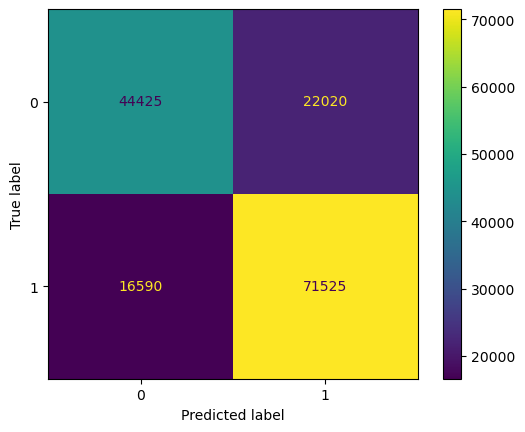

In [59]:
cm = confusion_matrix(y_test, y_pred, labels=fittedgrid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=fittedgrid.classes_)
disp.plot()
plt.show()

In [61]:
TN = cm[0,0]
FN = cm[1,0]
FP = cm[0,1]
TP = cm[1,1]
print(TN,FN,FP,TP)

44425 16590 22020 71525


In [66]:
precision_dt = TP/(TP+FP)
precision_dt

0.7646052701908173

In [67]:
recall_dt = TP/(TP+FN)
recall_dt

0.8117233161209783

In [68]:
print(f"Decision Tree Precision score: {precision_dt}")
print(f"Decision Tree Recall score: {recall_dt}")

Decision Tree Precision score: 0.7646052701908173
Decision Tree Recall score: 0.8117233161209783


Logistic regression model precision and recall values:
- LogReg Precision score: 0.80
- LogReg Recall score: 0.84

Decision tree model precision and recall values:
- Decision Tree Precision score: 0.76
- Decision Tree Recall score: 0.81

Regarding the precision score, it's evident that logistic regression outperforms the decision tree model, signifying that among all the instances it predicted as positive, logistic regression had a better ability to correctly identify true positives.

Similarly, in terms of the recall score, logistic regression excels, indicating that among all the actual positive cases in real life, logistic regression had a superior capability to accurately detect true positives.